# Avaliação 1 - Projeto de Machine Learning para Classificação de Câncer de Mama

In [153]:
#importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [154]:
PATH = "./data.csv"
df = pd.read_csv(PATH)

## Analise exploratoria dos dados

In [155]:
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [157]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [158]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

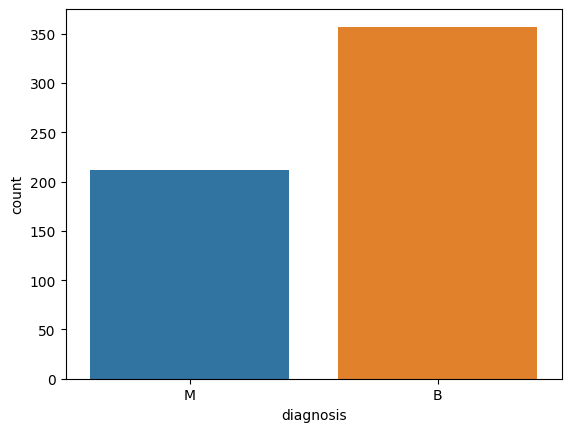

In [159]:
sns.countplot(x = 'diagnosis', data=df)

Percebemos então que os dados estão desbalanceados, pois há uma quantidade maior de diagnosticos Benignos do que Malignos

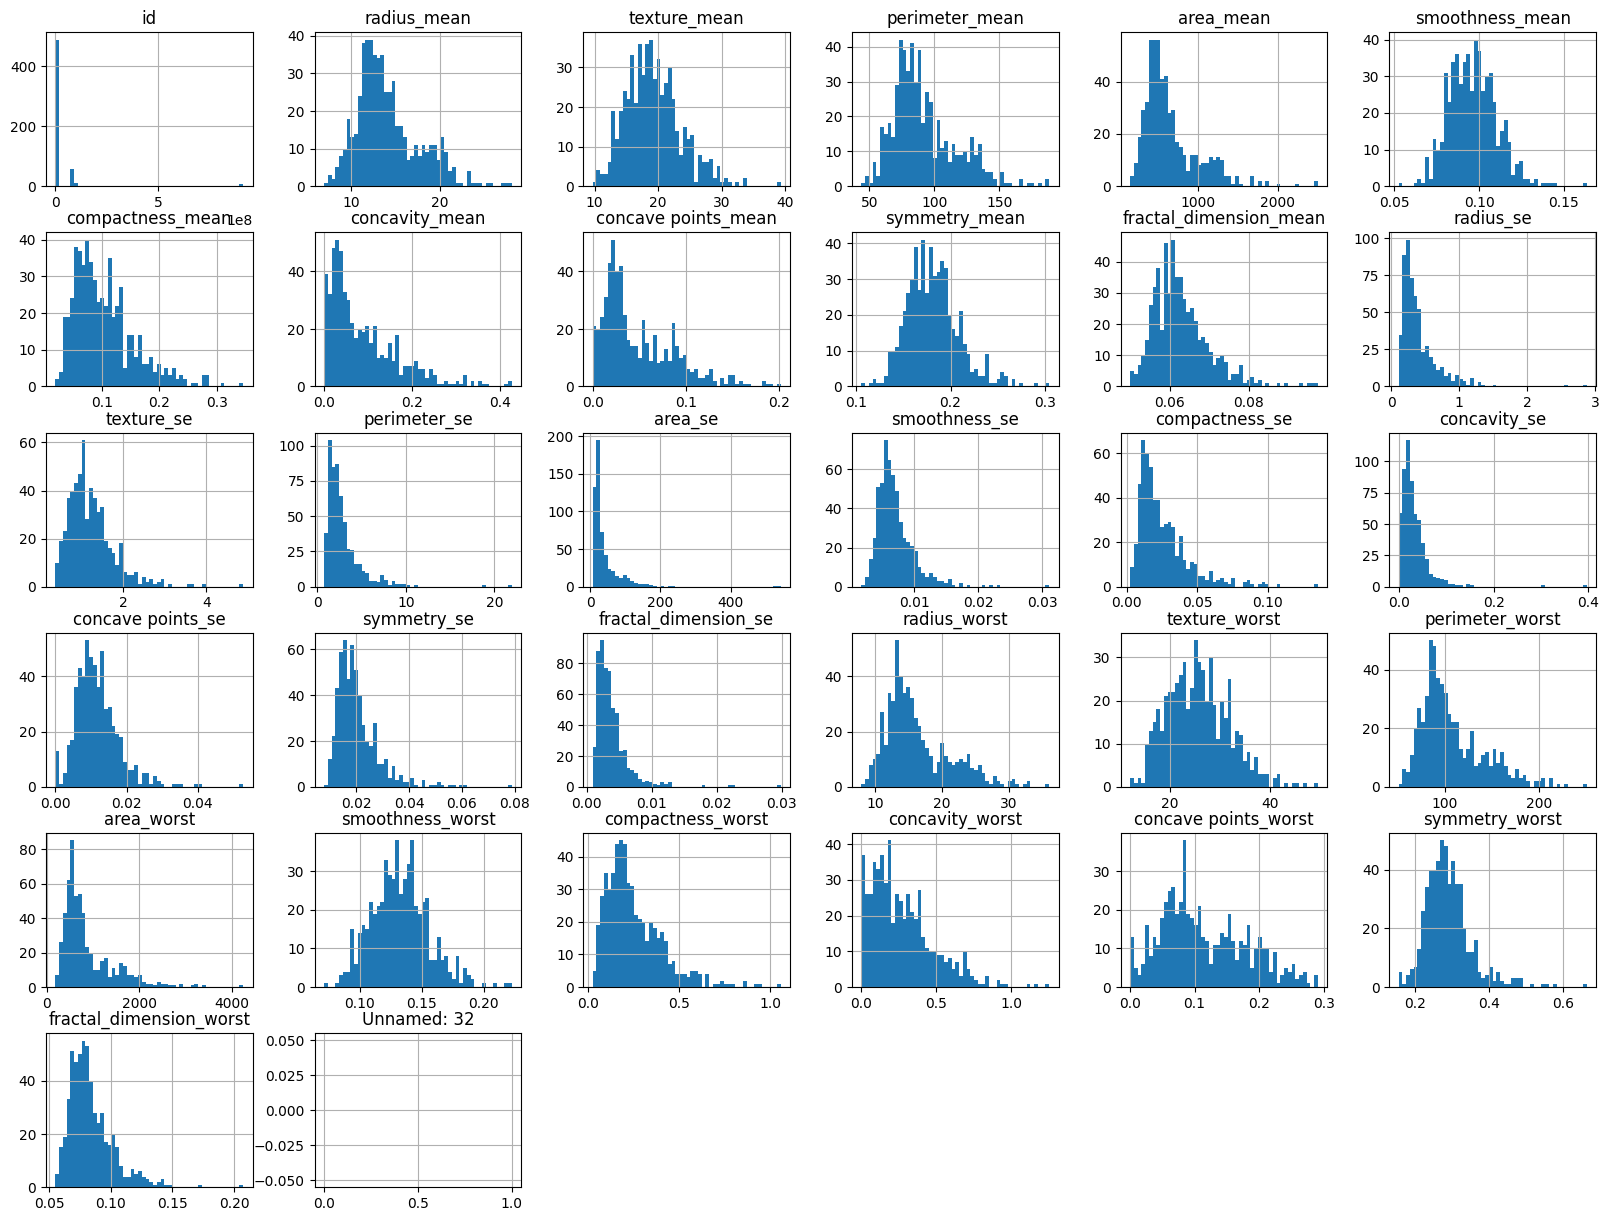

In [160]:
df.hist(bins=50, figsize=(20,15))
plt.show()

A partir desses graficos podemos perceber que as colunas 'Unnamed:32' e 'id' não serão uteis para a aprendizagem, sendo necessario então a sua retirada

In [161]:
clean_df = df.drop(axis=1, columns=['Unnamed: 32', 'id'])

In [162]:
print(clean_df.shape)
clean_df.head()

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Grafico de correlação


In [163]:
clean_df.corr()

C:\Users\Dahis\AppData\Local\Temp\ipykernel_14848\1437785805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clean_df.corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


C:\Users\Dahis\AppData\Local\Temp\ipykernel_14848\1099844061.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr())


<Axes: >

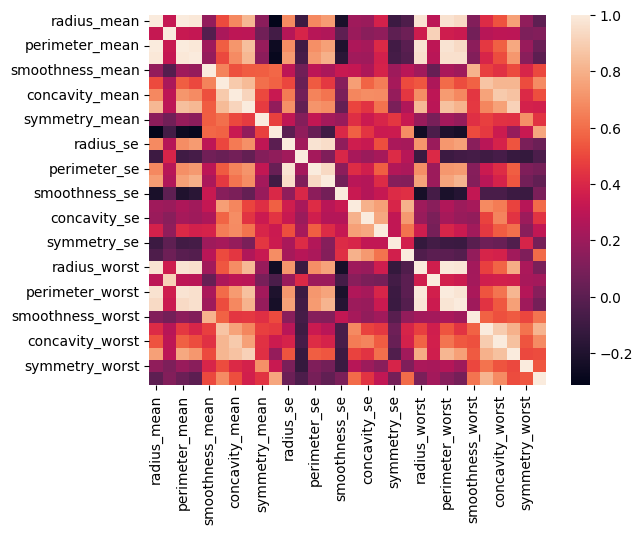

In [164]:
sns.heatmap(clean_df.corr())

### Outliers

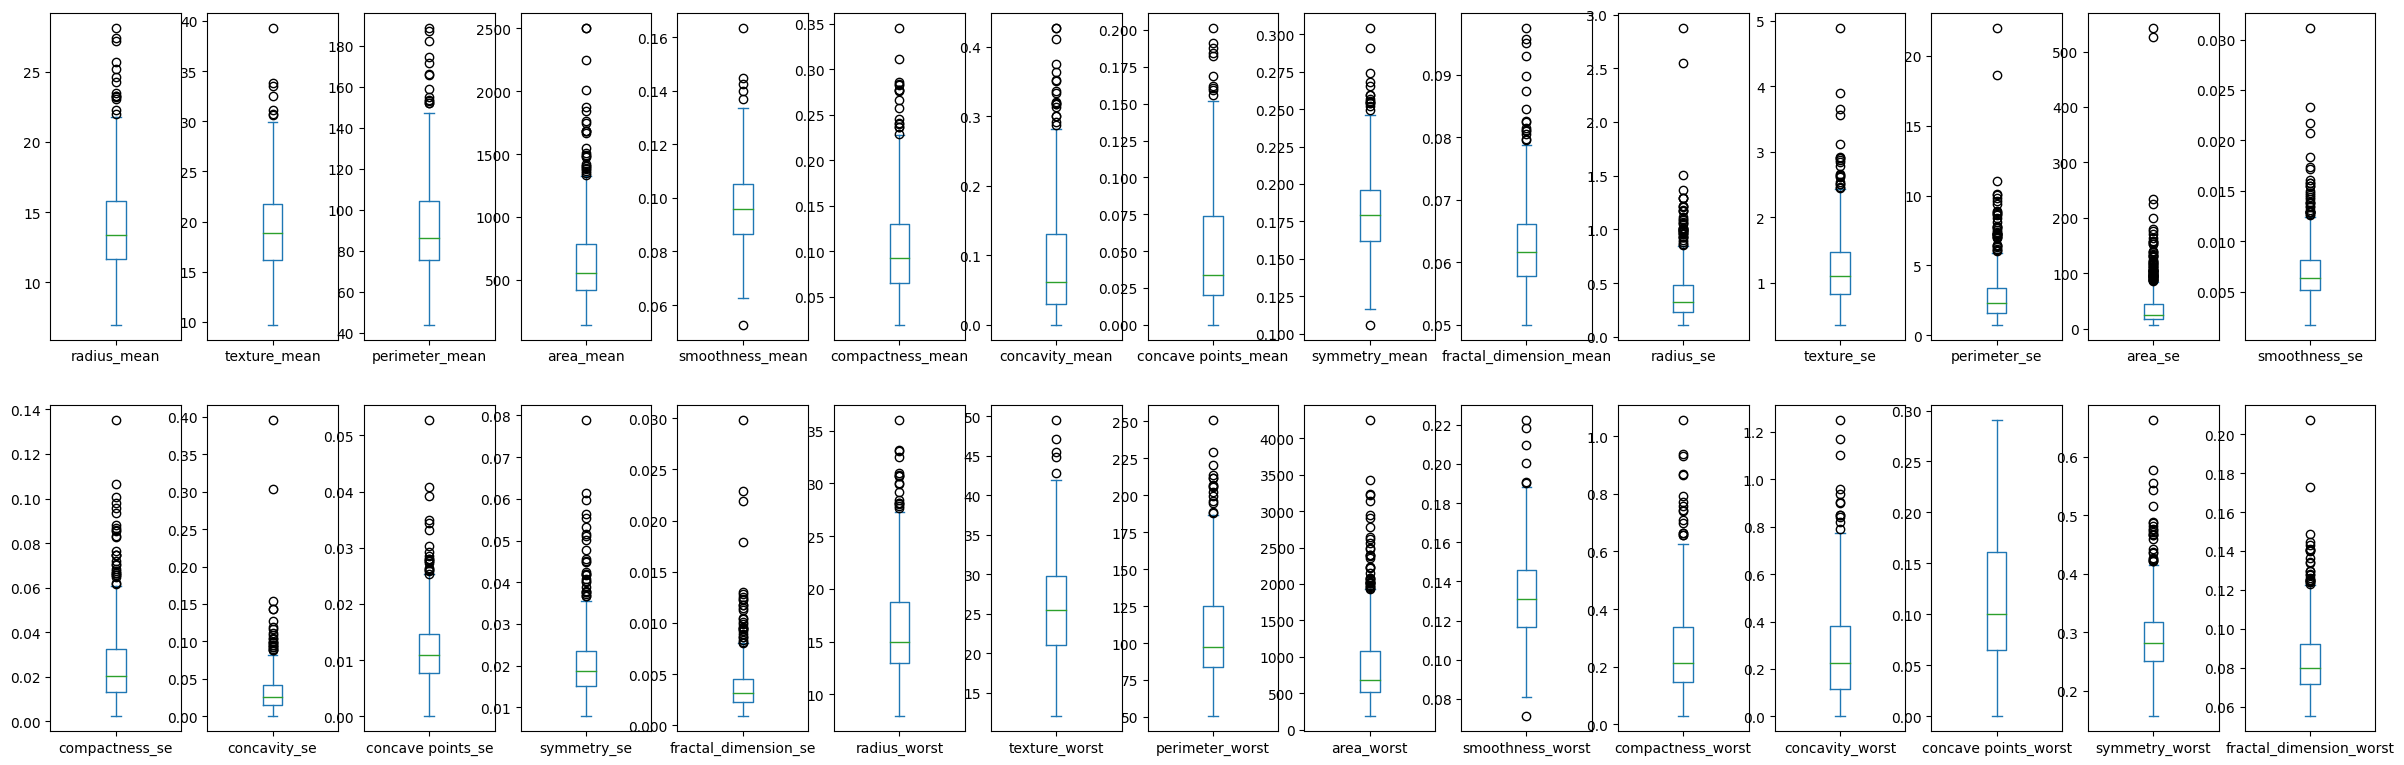

In [165]:
clean_df.plot(kind="box",subplots=True,layout=(10,15),figsize=(30,50));

Através do grafico acima é possivel identificar os outliers do dataset, esses dados fora do padrão podem atrapalar o processo de aprendizagem diminuindo a dua acuracia, por esse motivo, devemos elimina-los.

In [166]:
def euclidean_distance_outlier(x,cutoff):
    result_ = pd.Series([0] * len(x))
    data_mean = x.mean() # mean of data
    dist = np.sqrt(np.sum(((x-data_mean) ** 2),axis=1)) #Euclidean distande
    dist_mean = dist.mean() #mean of the distances
    dist_zscore = np.abs((dist - dist_mean) / dist.std())#z-score of the distances
    result_[((dist_zscore > cutoff))] = 1
    return result_

<Axes: xlabel='concave points_se', ylabel='symmetry_se'>

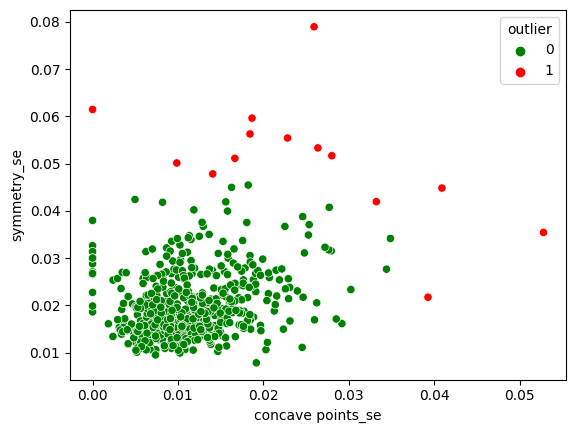

In [192]:
euc_d = clean_df[["concave points_se","symmetry_se"]].copy()
euc_d['outlier'] = euclidean_distance_outlier(euc_d,3)
sns.scatterplot(x="concave points_se",y="symmetry_se",data=euc_d,hue="outlier",palette=["green","red"])

## Pré-processamento dos dados

In [171]:
clean_df['diagnosis'] = clean_df['diagnosis'].map({'B':0,
                             'M':1,},
                             na_action=None)

In [172]:
clean_df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [173]:
#criar uma função para apresentar os resultados
def display_scores(scores):
  print("Scores:", scores)
  print("Média:", scores.mean())
  print("Desvio Padrão:", scores.std())

In [174]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [175]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [176]:
X_train_std

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [177]:
X_test_std

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

## Treinamento do modelo

In [178]:
X = clean_df.drop('diagnosis', axis=1)
Y = clean_df.diagnosis

In [179]:
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [180]:
#sem otimização de parametros
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10)#setar o embaralhamento
   cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: acuracia %f (desvio padrão: %f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: acuracia 0.950815 (desvio padrão: 0.026919)
LDA: acuracia 0.959555 (desvio padrão: 0.029449)
KNN: acuracia 0.926253 (desvio padrão: 0.046232)
CART: acuracia 0.929699 (desvio padrão: 0.023541)
NB: acuracia 0.936779 (desvio padrão: 0.036077)
SVM: acuracia 0.627663 (desvio padrão: 0.176997)


In [181]:
from sklearn.model_selection import GridSearchCV

#### K Neighbors Classifier

In [182]:
from sklearn.metrics import accuracy_score


KNN = KNeighborsClassifier()
KNN.fit(X_train_std, y_train)
KNN_train_preds = KNN.predict(X_test_std)
KNN_train_acc = accuracy_score(y_test, KNN_train_preds)
print(f'acuracia do modelo {KNN_train_acc}')

acuracia do modelo 0.9473684210526315


In [183]:
param_grid = [
    {'n_neighbors': [5, 10, 3], 'leaf_size':[30,20,50]},
    {'algorithm':['auto', 'ball_tree'], 'n_neighbors': [5, 10, 3], 'leaf_size':[30,20,50]},
]

In [184]:
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [30, 20, 50], 'n_neighbors': [5, 10, 3]},
                         {'algorithm': ['auto', 'ball_tree'],
                          'leaf_size': [30, 20, 50],
                          'n_neighbors': [5, 10, 3]}],
             return_train_score=True, scoring='accuracy')

In [185]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)

0.9604395604395606 {'leaf_size': 30, 'n_neighbors': 5}
0.9538461538461538 {'leaf_size': 30, 'n_neighbors': 10}
0.9604395604395604 {'leaf_size': 30, 'n_neighbors': 3}
0.9604395604395606 {'leaf_size': 20, 'n_neighbors': 5}
0.9538461538461538 {'leaf_size': 20, 'n_neighbors': 10}
0.9604395604395604 {'leaf_size': 20, 'n_neighbors': 3}
0.9604395604395606 {'leaf_size': 50, 'n_neighbors': 5}
0.9538461538461538 {'leaf_size': 50, 'n_neighbors': 10}
0.9604395604395604 {'leaf_size': 50, 'n_neighbors': 3}
0.9604395604395606 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5}
0.9538461538461538 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10}
0.9604395604395604 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 3}
0.9604395604395606 {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5}
0.9538461538461538 {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 10}
0.9604395604395604 {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3}
0.9604395604395606 {'algorithm': 'auto', 'le

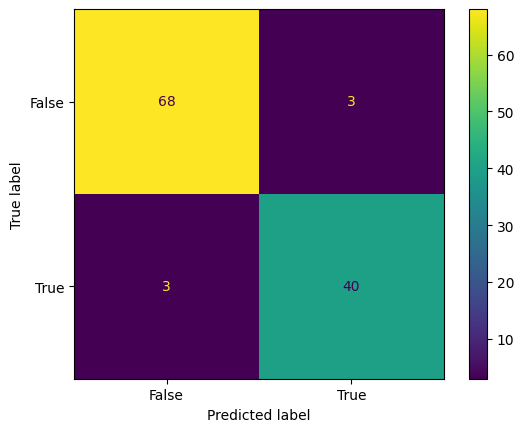

In [186]:
confusion_matrix = confusion_matrix(y_test, KNN_train_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Decision Tree

In [187]:
from sklearn.metrics import accuracy_score


tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train_std, y_train)
tree_train_preds = tree_clf.predict(X_test_std)
tree_train_acc = accuracy_score(y_test, tree_train_preds)
print(f'acuracia do modelo {tree_train_acc}')

acuracia do modelo 0.9473684210526315


In [188]:
param_grid = [
    {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':[30,20,50]},
    {'min_samples_leaf':[10, 20], 'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':[30,20,50]},
]

In [189]:
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [30, 20, 50]},
                         {'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [30, 20, 50],
                          'min_samples_leaf': [10, 20]}],
             return_train_score=True, scoring='accuracy')

In [190]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)

0.9164835164835164 {'criterion': 'gini', 'max_depth': 30}
0.9164835164835164 {'criterion': 'gini', 'max_depth': 20}
0.9164835164835164 {'criterion': 'gini', 'max_depth': 50}
0.9340659340659341 {'criterion': 'entropy', 'max_depth': 30}
0.9340659340659341 {'criterion': 'entropy', 'max_depth': 20}
0.9340659340659341 {'criterion': 'entropy', 'max_depth': 50}
0.9340659340659341 {'criterion': 'log_loss', 'max_depth': 30}
0.9340659340659341 {'criterion': 'log_loss', 'max_depth': 20}
0.9340659340659341 {'criterion': 'log_loss', 'max_depth': 50}
0.9142857142857143 {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 10}
0.9076923076923077 {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 20}
0.9142857142857143 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}
0.9076923076923077 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 20}
0.9142857142857143 {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 10}
0.9076923076923077 {'criterion': 'gini', 'max_d

In [191]:
confusion_matrix = confusion_matrix(y_test, tree_train_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

TypeError: 'numpy.ndarray' object is not callable

### SVM

In [ ]:
svm = SVC(random_state=42)
svm.fit(X_train_std, y_train)
svm_train_preds = svm.predict(X_test_std)
svm_train_acc = accuracy_score(y_test, svm_train_preds)
print(f'acuracia do modelo {svm_train_acc}')

acuracia do modelo 0.9824561403508771


In [ ]:
param_grid = [
    {'gamma': ['scale', 'auto'], 'shrinking':[True, False]},
    {'probability':[True, False], 'gamma': ['scale', 'auto'], 'shrinking':[True, False]},
]

In [ ]:
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'gamma': ['scale', 'auto'],
                          'shrinking': [True, False]},
                         {'gamma': ['scale', 'auto'],
                          'probability': [True, False],
                          'shrinking': [True, False]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)

0.9758241758241759 {'gamma': 'scale', 'shrinking': True}
0.9758241758241759 {'gamma': 'scale', 'shrinking': False}
0.9714285714285715 {'gamma': 'auto', 'shrinking': True}
0.9714285714285715 {'gamma': 'auto', 'shrinking': False}
0.9758241758241759 {'gamma': 'scale', 'probability': True, 'shrinking': True}
0.9758241758241759 {'gamma': 'scale', 'probability': True, 'shrinking': False}
0.9758241758241759 {'gamma': 'scale', 'probability': False, 'shrinking': True}
0.9758241758241759 {'gamma': 'scale', 'probability': False, 'shrinking': False}
0.9714285714285715 {'gamma': 'auto', 'probability': True, 'shrinking': True}
0.9714285714285715 {'gamma': 'auto', 'probability': True, 'shrinking': False}
0.9714285714285715 {'gamma': 'auto', 'probability': False, 'shrinking': True}
0.9714285714285715 {'gamma': 'auto', 'probability': False, 'shrinking': False}


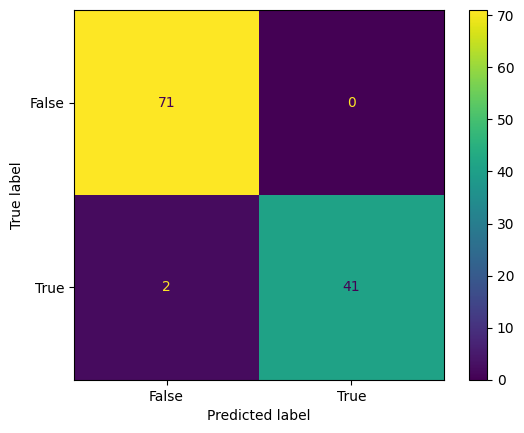

In [ ]:
confusion_matrix = confusion_matrix(y_test, svm_train_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()